We'll need `ipython-sql` which we can install by starting Jupyter and in a code cell running the following code:

`!conda install -yc conda-forge ipython-sql`

We'll only have to do this once.

In this project, we'll work with data from the **CIA World Factbook**, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

* `population` - The population as of `2015`.
* `population_growth` - The annual population growth rate, as a percentage.
* `area` - The total land and water area.

[suggested soltuion](https://github.com/dataquestio/solutions/blob/master/Mission257Solutions.ipynb)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

Someone may wonder that;

1. Why we're using **SQLite** at all if we're just reading in the results into **pandas** dataframes anyway?
2. Why not just use **pandas**? 

First, most **data analysts** and **data scientists** in the industry use a **SQL GUI** based tool, which:

* let us write queries and save them for later
* let us run queries against multiple enterprise database systems (`MySQL`, `Postgres`, etc.)
* return results as a table
* create standard visualizations like **line charts**, **bar plots**, and **histograms** from the results table without any programming

Here are some examples of GUI based **SQL** tools:

* [Mode Analytics](https://mode.com/product/)
* [Periscope Data](https://www.periscopedata.com/platform)
* [MySQL Workbench](https://www.mysql.com/products/workbench/)
* [Jack DB](https://www.jackdb.com/)

We'll use the following code to connect our Jupyter Notebook to our database file:

`%%capture
%load_ext sql
%sql sqlite:///factbook.db`

To run SQL queries in this project we add `%%sql` on its own line to the start of our query. So to execute the query , we'll use this code:

`%%sql`

`SELECT *
  FROM sqlite_master
 WHERE type='table';`

We're using `pandas` and `matplotlib` to display results neatly and visualize them because they let us focus on practicing thinking and working in **SQL**.

In [20]:
conn = sql.connect("factbook.db")

q1 = """Select * From sqlite_master 
        Where type = 'table' --- return information on the tables in the database
       """ 

In [21]:
def read_sql_query(query, conn):
    return pd.read_sql_query(query, conn)

In [22]:
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [38]:
q2 = "Select * From facts limit 5";
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


Here are the descriptions for some of the columns:

* `name` - The name of the country.
* `area` - The total land and sea area of the country.
* `population` - The country's population.
* `population_growth`- The country's population growth as a percentage.
* `birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.
* `death_rate` - The country's death rate, or the number of death a year per 1,000 people.
* `area`- The country's total area (both land and water).
* `area_land` - The country's land area in square kilometers.
* `area_water` - The country's waterarea in square kilometers.

In [39]:
# query that returns the:

# Minimum population
# Maximum population
# Minimum population growth
# Maximum population growth

q3 = """Select Min(population) min_pop, Max(population) max_pop,
        min(population_growth) mim_pop_grwt,
        Max(population_growth) max_pop_grwt 
        from facts 
        Limit 5"""

pd.read_sql_query(q3,conn)

,min_pop,max_pop,mim_pop_grwt,max_pop_grwt
0,0,7256490011,0.0,4.02


A few things stick out from the summary statistics :

* there's a country with a population of `0`
* there's a country with a population of `7256490011` (or more than `7.2 billion` people)

In [8]:
q4 = """Select name,population from facts 
        where population = '0' or population ='7256490011'
        """

pd.read_sql_query(q4,conn)

,name,population
0,Antarctica,0
1,World,7256490011


In [9]:
q4 = """Select * from facts 
    where population == (select min(population) from facts)
    """
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [10]:
q5 = """select * from facts 
        where population == (select max(population) from facts)"""
    
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


It seems like the table contains a row for the **whole world**, which explains the population of over `7.2 billion`. It also seems like the table contains a row for **Antarctica**, which explains the population of `0`

In [11]:
# q5 = """Select population, population_growth, birth_rate, death_rate from facts
#         Where population != '0' or population != '7256490011' 
#         """
q5 = """select population, population_growth, birth_rate, death_rate 
        from facts 
        where 
        population != (select min(population) from facts) 
        and 
        population != (select max(population) from facts)"""

df = pd.read_sql_query(q5,conn)
df.head()

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


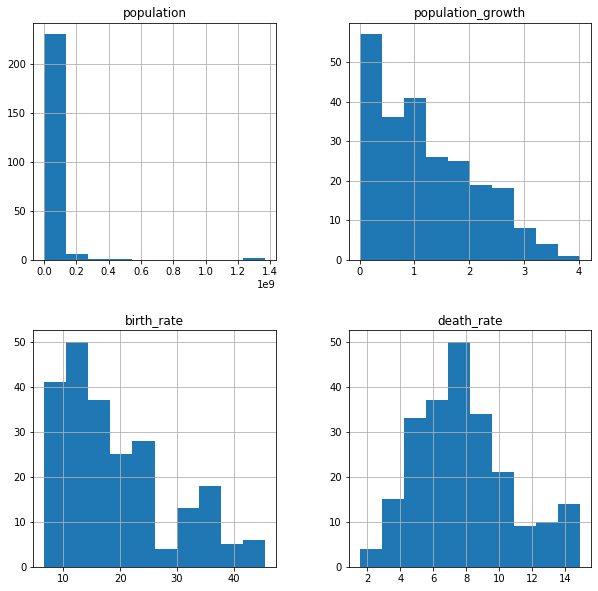

In [16]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(2,2,4)
df.hist(ax = ax)
plt.show()

In [17]:
# Recompute the summary statistics excluding the row for the whole world.

q5 = """SELECT MIN(population) AS min_pop,
        MAX(population) AS max_pop,
        MIN(population_growth) AS min_pop_growth,
        MAX(population_growth) AS max_pop_growth 
        FROM facts
        WHERE name <> 'World';"""  # WHERE name != 'World'

pd.read_sql_query(q5,conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,1367485388,0.0,4.02


In [20]:
q5 = """SELECT AVG(population) AS avg_population, AVG(area) AS avg_area
        FROM facts
        WHERE name != 'World';"""

pd.read_sql_query(q5,conn)

,avg_population,avg_area
0,3.224267e+07,555093.546185


In [21]:
q6 = """SELECT *
        FROM facts
        WHERE 
        population > (SELECT AVG(population)
                           FROM facts
                           WHERE name <> 'World'
                        )
        AND 

        area < (SELECT AVG(area)
                     FROM facts
                     WHERE name <> 'World'
);"""


pd.read_sql_query(q6,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,14,bg,Bangladesh,148460,130170,18290,168957745,1.60,21.14,5.61,0.46
1,65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
2,80,iz,Iraq,438317,437367,950,37056169,2.93,31.45,3.77,1.62
3,83,it,Italy,301340,294140,7200,61855120,0.27,8.74,10.19,4.10
4,85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.00
5,91,ks,"Korea, South",99720,96920,2800,49115196,0.14,8.19,6.75,0.00
6,120,mo,Morocco,446550,446300,250,33322699,1.00,18.20,4.81,3.36
7,138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
8,139,pl,Poland,312685,304255,8430,38562189,0.09,9.74,10.19,0.46
9,163,sp,Spain,505370,498980,6390,48146134,0.89,9.64,9.04,8.31


In [17]:
q6 = """select name, cast(population as float)/cast(area as float) density 
        from facts 
        order by density desc 
        limit 20"""

pd.read_sql_query(q6, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


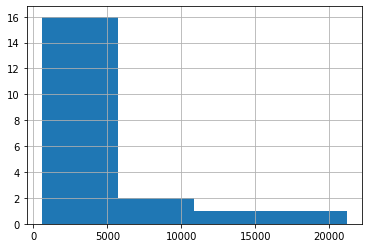

In [18]:
pd.read_sql_query(q6, conn)["density"].hist(bins = 4)
plt.show()

In [12]:
q7 = '''select population, population_growth, birth_rate, death_rate
        from facts
        where population != (select max(population) from facts)
        and population != (select min(population) from facts);
        '''
pd.read_sql_query(q7, conn)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
...,...,...,...,...
235,3598357,0.60,10.86,8.67
236,103574,0.59,10.31,8.54
237,1869055,2.81,31.11,3.04
238,2785366,1.95,22.99,3.50


Here are some next steps to explore:

* What country has the most people? What country has the highest growth rate?
* Which countries have the highest ratios of water to land? Which countries have more water than land?
* Which countries will add the most people to their population next year?
* Which countries have a higher death rate than birth rate?
* What countries have the highest population/area ratio and how does it compare to list we found in the previous screen?